# Customer Segmentation and Clustering of Mall Customers

*By Sneha Narayanan*

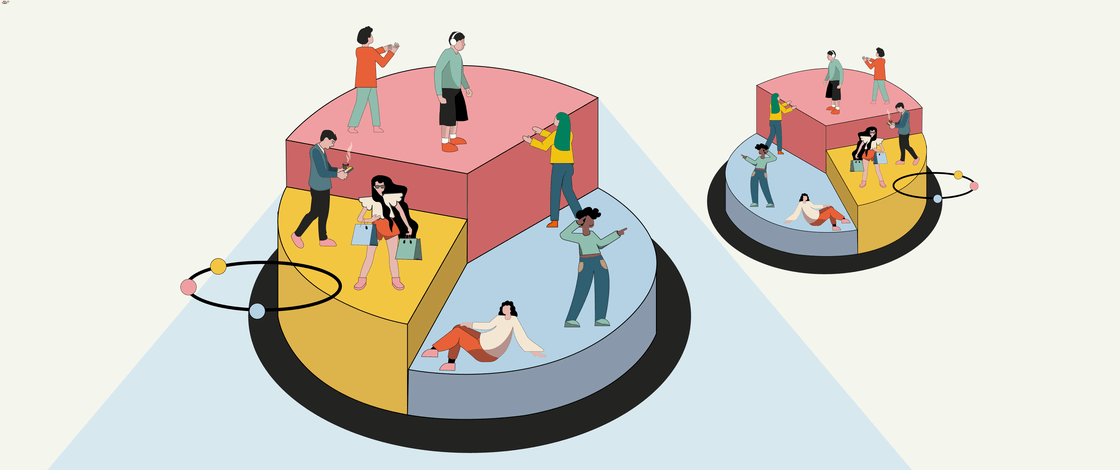

In [2]:
from IPython.display import Image
Image(filename='1. Top Customer Segmentation.png')

In [1]:
!pip install yellowbrick

Importing Libraries and Data

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# SETTING THE STYLE
#sns.set_style('whitegrid')
#plt.style.use('fivethirtyeight')

In [64]:
df= pd.read_csv('Mall_Customers.csv')

In [65]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pre-Processing

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

From the above it is clear that there are no null values

In [68]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


1. The mean age is 38.85, annual inc is 60.56 and spending score is 50.2.

2. Min and max ages are 18 and 70. The min and max annual inc was 15 and 137 resp. Spending score min-1 max-99.

In [69]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


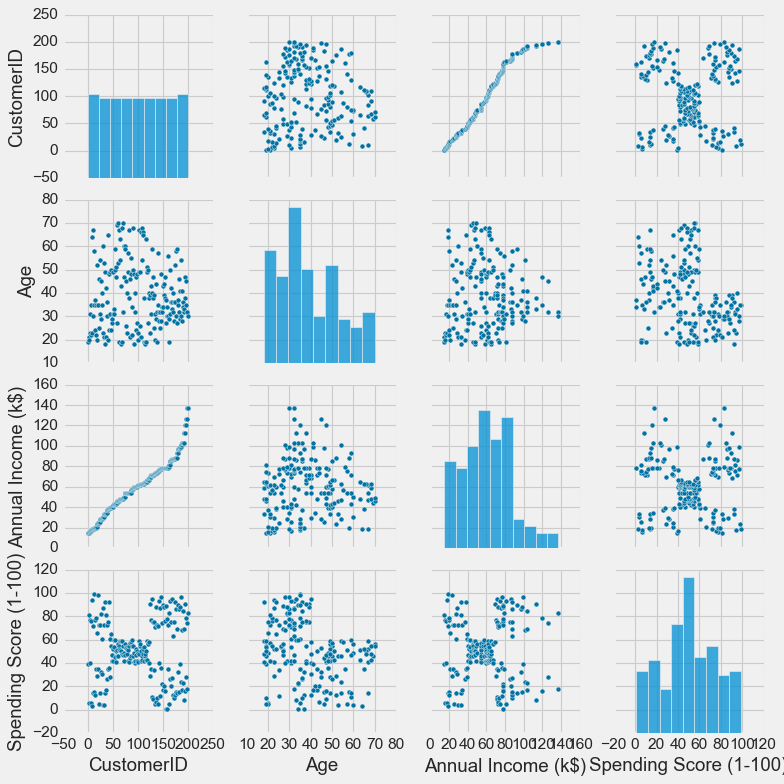

In [70]:
sns.pairplot(df)

In the above pairplot you can see small spherical shapes/clusters in annual income w.r.t spending score and 
vice versa.

In [13]:
data=df.drop(['CustomerID','Genre','Age'],axis=1)

In [14]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


SUM OF SQ DIST METHOD- ELBOW METHOD

In [42]:
sum_of_sq=[]
K = range(2,10) #since this is a range it's only from 2 to 9 which is basically 8

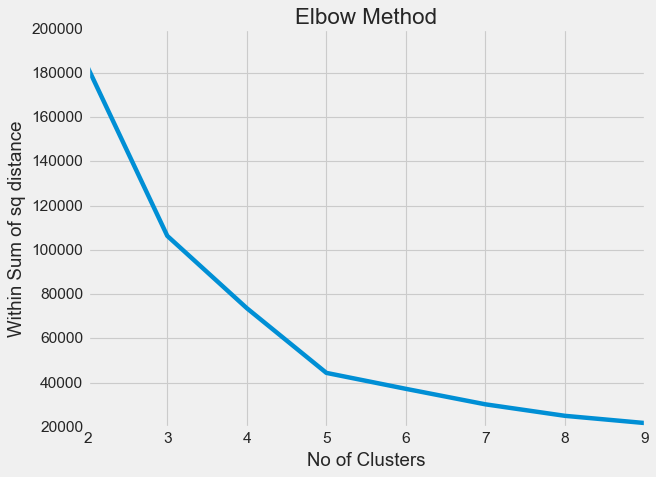

In [43]:
for k in K:
    km = KMeans(n_clusters=k) #creates the KM model
    km = km.fit(data)
    sum_of_sq.append(km.inertia_) #inertia_ (is an inbuilt variable) that will give sum of sq distance
plt.plot(K,sum_of_sq)
plt.xlabel('No of Clusters')
plt.ylabel('Within Sum of sq distance')
plt.title('Elbow Method')
plt.show()

From the above graph it is not clear if the elbow point is 3 or 5 hence we need a visualizer.

ELBOW VISUALIZER

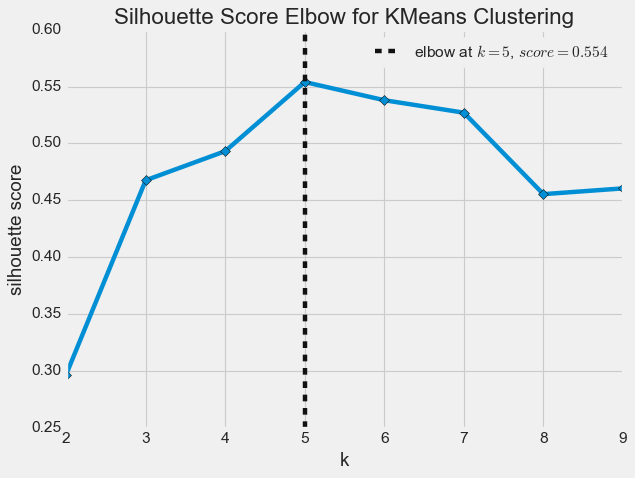

In [51]:
km_model=KMeans(random_state=123)
visualizer=KElbowVisualizer(km_model,k=(2,10),metric='silhouette',timings=False)
visualizer.fit(data)
visualizer.show()
plt.show()

1. The elbow point is at K=5, suggesting optimal no. of clusters.


2. The silhouette score is 0.554, which means that there is moderate similarity between the data points within 
the cluster.

In [49]:
km_model = KMeans(n_clusters=5,random_state=123)
cluster = km_model.fit_predict(data)
cluster

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [52]:
df['cluster']=cluster
df.drop(['Genre'],axis=1,inplace=True)

In [53]:
cluster_analysis = df.groupby('cluster').mean()
cluster_analysis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,23.090909,25.272727,25.727273,79.363636
1,86.320988,42.716049,55.296296,49.518519
2,162.000000,32.692308,86.538462,82.128205
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


Initially befor the clustering we could see that age had negative correlation with annual income and spending score.
But now we can see the clear relationship of how annual income and spending score varies with age.

1. Customers in cluster zero are of moderate age of around 25 yrs and annual inc of 25.7
but have a high spending score of around 79.36.

2. Customers in cluster 1,from a bit more older age grp 42 yrs with a moderate mean income of 55.29 have 
moderate spending score of 49.

3. Customers in cluster 2, with an avg age of 36 have both high annaul inc and high spending score of 
86.5 and 82.12 respectively.

4. Customers in cluster 3, are older who fall with mean age of 41, and they have a high annual inc of 88.2 with
a very low.

In [54]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

In [55]:
df1.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

Visualization of Clusters

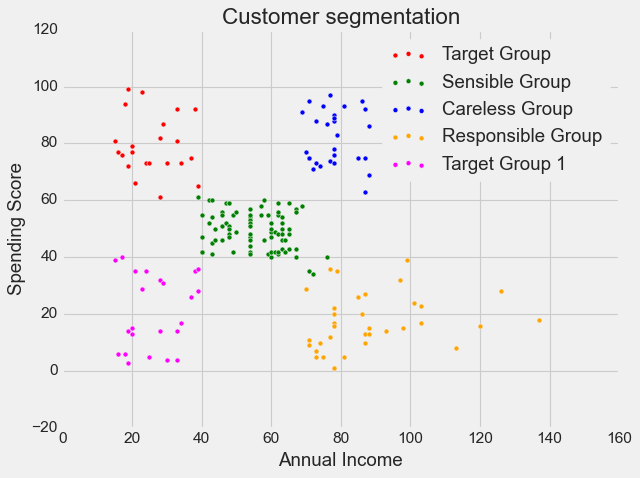

In [73]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],c='red',label='Target Group')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c='green',label='Sensible Group')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],c='blue',label='Careless Group')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],c='orange',label='Responsible Group')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],c='magenta',label='Target Group 1')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()